In [1]:
!PIP install pandas

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data=pd.read_csv('Datasets/IMDb_Dataset.csv')

### Find Shape of dataset

In [5]:
data.shape

(400, 9)

### Get information 

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               400 non-null    object 
 1   IMDb Rating         400 non-null    float64
 2   Year                400 non-null    int64  
 3   Certificates        400 non-null    object 
 4   Genre               400 non-null    object 
 5   Director            400 non-null    object 
 6   Star Cast           400 non-null    object 
 7   MetaScore           400 non-null    float64
 8   Duration (minutes)  400 non-null    float64
dtypes: float64(3), int64(1), object(5)
memory usage: 28.3+ KB


### Check Null values

In [13]:
### Check Missing Values In The Dataset

print("Any missing value?", data.isnull().values.any())
data.isnull().sum()

Any missing value? False


Title                 0
IMDb Rating           0
Year                  0
Certificates          0
Genre                 0
Director              0
Star Cast             0
MetaScore             0
Duration (minutes)    0
dtype: int64

### Check For Duplicate Data

In [15]:
dup_data=data.duplicated().any()

print("Are there any duplicate values?",dup_data)


Are there any duplicate values? True


In [111]:
#data=data.drop_duplicates () 
#data

### Get Overall Statistics About The DataFrame


In [18]:
data.describe(include='all')

,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Duration (minutes)
count,400,400.000000,400.000000,400,400,400,400,400.000000,400.000000
unique,251,NaN,NaN,11,10,199,247,NaN,NaN
top,Planet of the Apes,NaN,NaN,R,Action,George Miller,Gil KenanJason ReitmanIvan Reitman,NaN,NaN
freq,5,NaN,NaN,183,138,14,7,NaN,NaN
mean,NaN,7.110250,2015.150000,NaN,NaN,NaN,NaN,66.898750,116.334750
std,NaN,0.932251,13.470194,NaN,NaN,NaN,NaN,15.312006,21.369757
min,NaN,3.900000,1939.000000,NaN,NaN,NaN,NaN,26.000000,80.000000
25%,NaN,6.700000,2010.750000,NaN,NaN,NaN,NaN,57.750000,101.000000
50%,NaN,7.100000,2023.000000,NaN,NaN,NaN,NaN,66.900000,116.000000
75%,NaN,7.700000,2024.000000,NaN,NaN,NaN,NaN,77.000000,124.000000


### Display Title of The Movie Having Runtime >= 180 Minutes

In [11]:
data[data['Duration (minutes)']>=190]['Title']

104                        Animal
131    Killers of the Flower Moon
Name: Title, dtype: object

### Find the Average Rating for each director

In [23]:
data.groupby('Director')['IMDb Rating'].mean()

Director
Aaron Horvath       7.000
Adam Wingard        6.225
Adil El Arbi        7.100
Alex Garland        7.400
Alex Proyas         7.500
                    ...  
William Eubank      6.500
Yorgos Lanthimos    7.450
Zach Cregger        7.000
Zack Snyder         5.400
Zelda Williams      6.100
Name: IMDb Rating, Length: 199, dtype: float64

### Find the Average Rating for Top10 directors

In [25]:
data.groupby('Director')['IMDb Rating'].mean().sort_values(ascending=False)

Director
Sidney Lumet           9.0
Peter Jackson          8.9
Christopher Nolan      8.8
Lana Wachowski         8.7
David Fincher          8.6
                      ... 
Spenser Cohen          4.9
Mark Waters            4.8
Rako Prijanto          4.6
Michelle Schumacher    4.4
S.J. Clarkson          3.9
Name: IMDb Rating, Length: 199, dtype: float64

## Comparing Frequency in the Genre according with Certificate

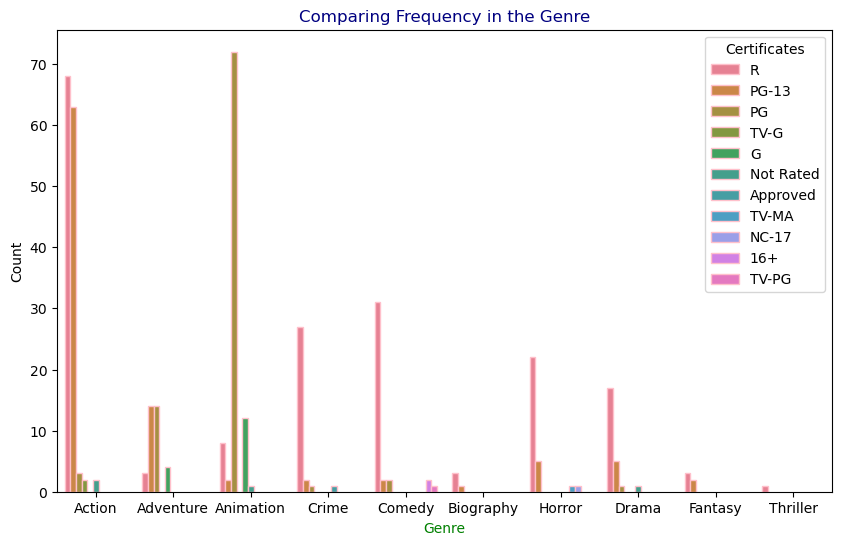

In [107]:
plt.figure(figsize = (10,6))
sns.countplot(data = data, x = 'Genre', hue = 'Certificates', edgecolor = 'pink')
plt.xlabel('Genre' , color = 'green')
plt.ylabel('Count', color = 'black')
plt.title("Comparing Frequency in the Genre", color = 'navy')
plt.show()

## Year Vs Metascore

In [115]:
data.groupby('Year')['MetaScore'].mean().sort_values(ascending=False)

Year
1972    100.000000
1957     97.000000
1976     94.000000
1939     92.000000
1990     92.000000
2015     88.322222
1991     86.000000
2003     83.000000
2017     79.500000
1994     79.500000
1979     79.400000
2007     79.000000
1968     79.000000
2009     78.500000
1986     78.000000
1987     78.000000
1981     77.000000
2006     77.000000
2005     76.000000
2018     75.750000
2004     74.428571
2001     73.727273
2011     73.666667
2013     71.666667
2010     71.475000
1988     71.000000
2016     70.625000
2002     69.666667
2008     69.400000
1995     69.000000
2012     68.000000
1996     68.000000
1985     68.000000
2014     67.250000
1971     67.000000
2000     67.000000
2025     66.900000
2022     66.777778
1999     66.200000
2023     65.457143
1993     63.666667
2024     60.503497
2021     60.111111
2019     59.500000
1997     59.333333
1984     58.000000
1983     45.000000
Name: MetaScore, dtype: float64

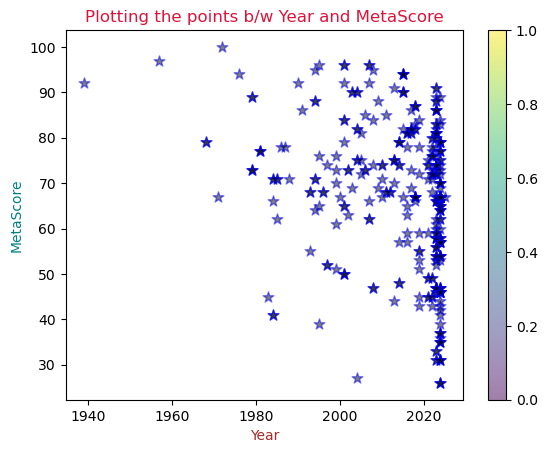

In [62]:
plt.scatter(data['Year'], data['MetaScore'], marker = '*', color = 'black', s = 65, edgecolor = 'b', alpha = 0.5)
plt.xlabel('Year', color = 'brown')
plt.ylabel('MetaScore', color = 'teal')
plt.title("Plotting the points b/w Year and MetaScore", color = 'crimson')
plt.colorbar()
plt.show()

## Top 10 Lengthy Movies Title and Runtime

In [26]:
top10_len=data.nlargest(10,"Duration (minutes)")[['Title','Duration (minutes)']]\
.set_index('Title')
top10_len

,Duration (minutes)
Title,
Killers of the Flower Moon,206.0
Animal,204.0
The Green Mile,189.0
Avengers: Endgame,181.0
The Wolf of Wall Street,180.0
The Wolf of Wall Street,180.0
The Lord of the Rings: The Fellowship of the Ring,178.0
The Batman,176.0
The Godfather,175.0


<Axes: xlabel='Duration (minutes)', ylabel='Title'>

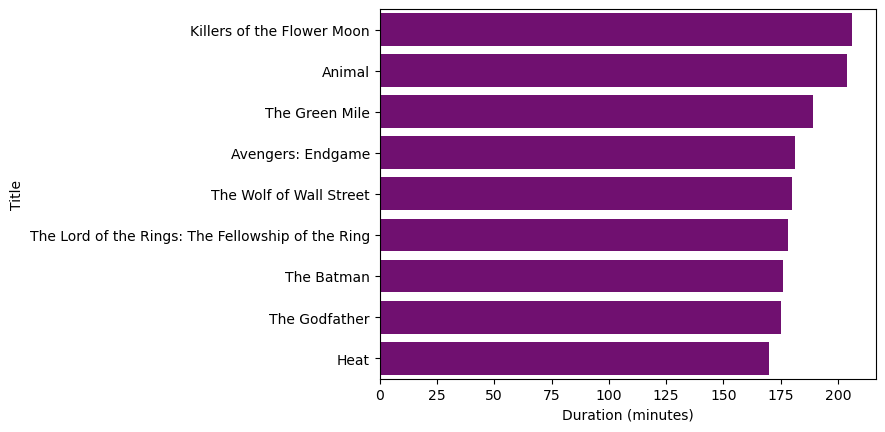

In [211]:
sns.barplot(x=('Duration (minutes)'),y=top10_len.index,data=top10_len,color='purple')

## Number of Movies per Year

In [35]:
mp=data['Year'].value_counts()
mp

Year
2024    143
2023     63
2022     18
2018     12
2001     11
2019     10
2015      9
2021      9
2017      8
2014      8
2016      8
2004      7
1994      6
2007      6
2013      6
1999      5
2008      5
1979      5
1984      5
1995      4
2010      4
1981      3
2005      3
2006      3
1993      3
2003      3
1997      3
2011      3
1985      3
2002      3
1996      2
1968      2
2009      2
2012      2
1987      1
1939      1
1971      1
2025      1
2000      1
1972      1
1990      1
1983      1
1991      1
1957      1
1976      1
1986      1
1988      1
Name: count, dtype: int64

## Top 10 Years by Count of Movies

In [53]:
top10_mpy=data['Year'].value_counts().head(10)
top10_mpy

Year
2024    143
2023     63
2022     18
2018     12
2001     11
2019     10
2015      9
2021      9
2017      8
2014      8
Name: count, dtype: int64

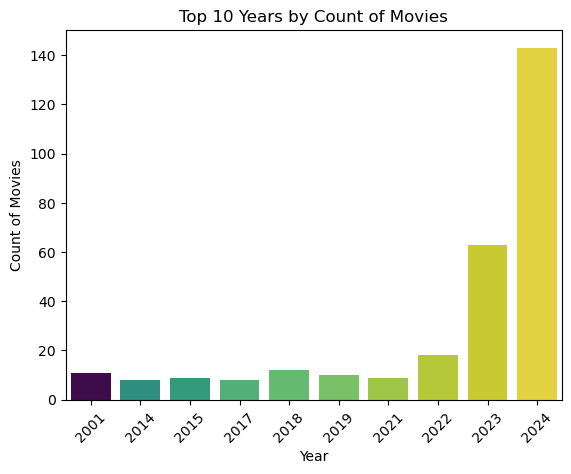

In [69]:
sns.barplot(x=top10_mpy.index, y=top10_mpy.values, hue=top10_mpy.index, palette='viridis', dodge=False)
plt.title('Top 10 Years by Count of Movies')
plt.xlabel('Year')
plt.ylabel('Count of Movies')
plt.xticks(rotation=45)
plt.legend([], [], frameon=False)  # Hide the legend since hue is redundant
plt.show()


## IMDb Ratings by Year

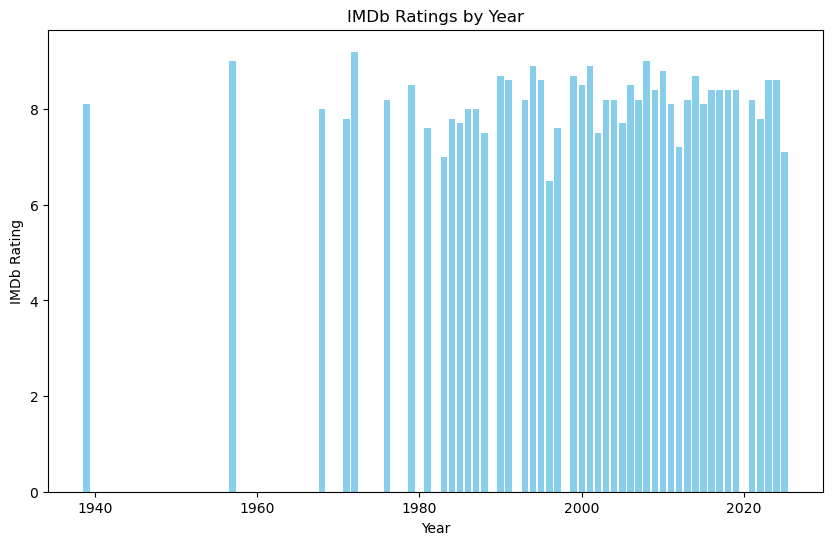

In [82]:
plt.figure(figsize=(10, 6))
plt.bar(data['Year'], data['IMDb Rating'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('IMDb Rating')
plt.title('IMDb Ratings by Year')
plt.show()

## Genres by Year

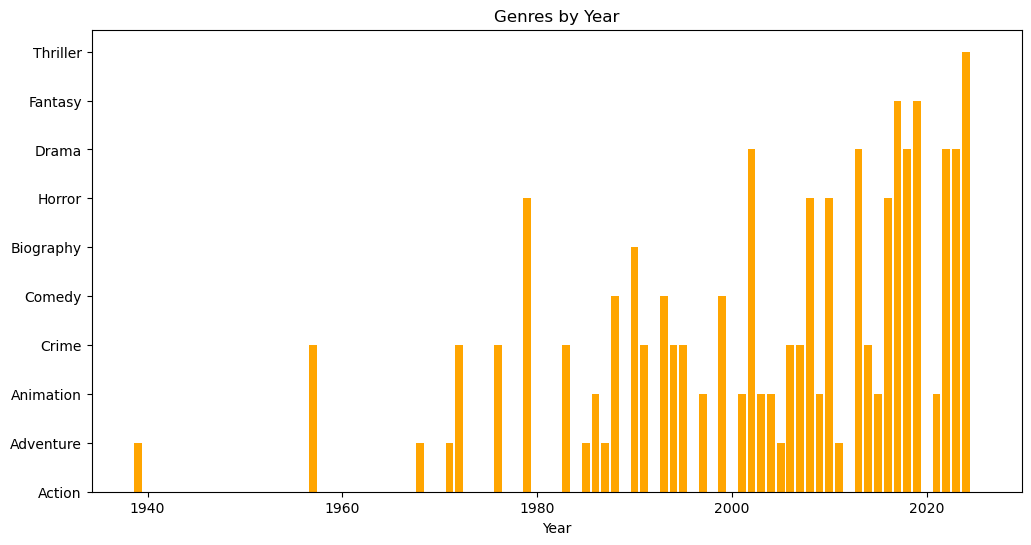

In [101]:
plt.figure(figsize=(12, 6))
plt.bar(data['Year'], data['Genre'], color='orange')
plt.xlabel('Year')
#plt.ylabel('Genre')
plt.title('Genres by Year')
plt.show()

## Top 10 Highest Rated Movie and its Director

In [135]:
top10_hmd=data.nlargest(10,"IMDb Rating")[['Title','IMDb Rating','Director']]\
.set_index('Title')
top10_hmd

,IMDb Rating,Director
Title,,
The Godfather,9.2,Francis Ford Coppola
12 Angry Men,9.0,Sidney Lumet
The Dark Knight,9.0,Christopher Nolan
The Lord of the Rings: The Fellowship of the Ring,8.9,Peter Jackson
Pulp Fiction,8.9,Quentin Tarantino
Inception,8.8,Christopher Nolan
Inception,8.8,Christopher Nolan
Interstellar,8.7,Christopher Nolan
Goodfellas,8.7,Martin Scorsese


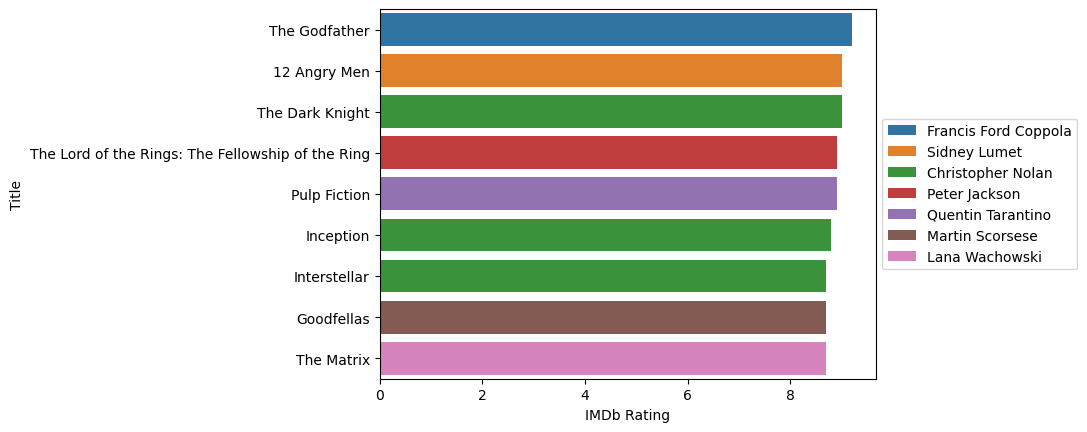

In [175]:
sns.barplot(x=("IMDb Rating"), y=top10_hmd.index, data=top10_hmd,hue=("Director"),\
            dodge=False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [171]:
data.columns

Index(['Title', 'IMDb Rating', 'Year', 'Certificates', 'Genre', 'Director',
       'Star Cast', 'MetaScore', 'Duration (minutes)'],
      dtype='object')

### Classification of Movies Based on Ratings(Excellent,Good,Average)

In [181]:
def rating(rating):
    if rating>= 7.0:
        return "Excellent"
    elif rating>= 6.0:
        return"Good"
    else:
        return"Average"

In [191]:
data['Rating_cat']=data['IMDb Rating'].apply(rating)
#new column named Rating_cat is adeded to the dataset

In [199]:
data.head()

,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Duration (minutes),rating_cat,Rating_cat
0,Gladiator,8.5,2000,R,Action,Ridley Scott,David FranzoniJohn LoganWilliam Nicholson,67.0,155.0,Excellent,Excellent
1,Mission: Impossible - Dead Reckoning Part One,7.7,2023,PG-13,Action,Christopher McQuarrie,Tom CruiseHayley AtwellVing Rhames,81.0,163.0,Excellent,Excellent
2,Rebel Moon - Part Two: The Scargiver,5.2,2024,PG-13,Action,Zack Snyder,Zack SnyderKurt JohnstadShay Hatten,35.0,122.0,Average,Average
3,Inglourious Basterds,8.4,2009,R,Adventure,Quentin Tarantino,Brad PittDiane KrugerEli Roth,69.0,153.0,Excellent,Excellent
4,Borderlands,7.1,2024,R,Action,Eli Roth,Eli RothJoe Crombie,66.9,116.3,Excellent,Excellent
